In [1]:
# 1. Solving a System of Linear Equations 
## Use Python to solve the following system of equations. Hint: You can write this system as a matrix equation in in the form Ax = b, where the matrix A is invertible.

In [2]:
def print_matrix(Title, M):
    print(Title)
    for row in M:
        print([round(x,3)+0 for x in row])
        
def print_matrices(Action, Title1, M1, Title2, M2):
    print(Action)
    print(Title1, '\t'*int(len(M1)/2)+"\t"*len(M1), Title2)
    for i in range(len(M1)):
        row1 = ['{0:+7.3f}'.format(x) for x in M1[i]]
        row2 = ['{0:+7.3f}'.format(x) for x in M2[i]]
        print(row1,'\t', row2)
        
def zeros_matrix(rows, cols):
    A = []
    for i in range(rows):
        A.append([])
        for j in range(cols):
            A[-1].append(0.0)

    return A

def copy_matrix(M):
    rows = len(M)
    cols = len(M[0])

    MC = zeros_matrix(rows, cols)

    for i in range(rows):
        for j in range(rows):
            MC[i][j] = M[i][j]

    return MC

def matrix_multiply(A,B):
    rowsA = len(A)
    colsA = len(A[0])

    rowsB = len(B)
    colsB = len(B[0])

    if colsA != rowsB:
        print('Number of A columns must equal number of B rows.')
        sys.exit()

    C = zeros_matrix(rowsA, colsB)

    for i in range(rowsA):
        for j in range(colsB):
            total = 0
            for ii in range(colsA):
                total += A[i][ii] * B[ii][j]
            C[i][j] = total

    return C

In [3]:
# Define A, B and I Matrices:
A = [[27, -10, 4, -29],[-16,5,-2,18],[-17,4,-2,20],[-7,2,-1,8]]
I =  [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
B = [[1],[-1],[0],[1]]
# print
print_matrix('A Matrix', A)
print()
print_matrix('I Matrix', I)

A Matrix
[27, -10, 4, -29]
[-16, 5, -2, 18]
[-17, 4, -2, 20]
[-7, 2, -1, 8]

I Matrix
[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]


In [4]:
# AM and IM are the same as A and I matrices
AM = copy_matrix(A)
IM = copy_matrix(I)
n = len(AM)

exString = """
AM stands for "A Matrix Morphing", IM Matrix stands for "I Matrix Morphing"
"""
# print my work
print(exString)
print_matrix('AM Matrix', AM)
print()
print_matrix('IM Matrix', IM)


AM stands for "A Matrix Morphing", IM Matrix stands for "I Matrix Morphing"

AM Matrix
[27, -10, 4, -29]
[-16, 5, -2, 18]
[-17, 4, -2, 20]
[-7, 2, -1, 8]

IM Matrix
[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]


In [5]:
# Run the cells where the focus diagnol equals zero
fd = 0  
fdScaler = 1. / AM[fd][fd]

# fs stands for focus diagonal or the first step in (Sk1 equation)
# Sk1 diagonal elements where i and j = 1 to n, independently

for j in range(n): # using j to indicate cycling thru columns
    AM[fd][j] = fdScaler * AM[fd][j]
    IM[fd][j] = fdScaler * IM[fd][j]

# print the first row of each matrix by the first diagonal element in AM matrix
print_matrix('AM Matrix', AM)
print()
print_matrix('IM Matrix', IM)

AM Matrix
[1.0, -0.37, 0.148, -1.074]
[-16, 5, -2, 18]
[-17, 4, -2, 20]
[-7, 2, -1, 8]

IM Matrix
[0.037, 0.0, 0.0, 0.0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]


In [6]:
n = len(A)
indices = list(range(n))

for i in indices[0:fd] + indices[fd+1:]: # *** skip row with fd in it.
    crScaler = AM[i][fd] # cr stands for "current row".
    for j in range(n): # cr - crScaler * fdRow, but one element at a time.
        AM[i][j] = AM[i][j] - crScaler * AM[fd][j]
        IM[i][j] = IM[i][j] - crScaler * IM[fd][j]
    
print_matrix('AM Matrix', AM)
print()
print_matrix('IM Matrix', IM)

AM Matrix
[1.0, -0.37, 0.148, -1.074]
[0.0, -0.926, 0.37, 0.815]
[0.0, -2.296, 0.519, 1.741]
[0.0, -0.593, 0.037, 0.481]

IM Matrix
[0.037, 0.0, 0.0, 0.0]
[0.593, 1.0, 0.0, 0.0]
[0.63, 0.0, 1.0, 0.0]
[0.259, 0.0, 0.0, 1.0]


In [7]:
# Use the first row of the previous equation to drive the other elements in AM matrtix to zero. 
indices = list(range(n)) # to allow flexible row referencing 
# I have already run for fd = 0, now running for fd = 1 to the last fd
for fd in range(1,n): # fd stands for focus diagonal
    fdScaler = 1.0 / AM[fd][fd]
    # FIRST: scale fd row with fd inverse. 
    for j in range(n): # Use j to indicate column looping.
        AM[fd][j] *= fdScaler
        IM[fd][j] *= fdScaler
    
    # Section to print out current actions:
    string1 = '\nUsing the matrices above, Scale row-{} of AM and IM by '
    string2 = 'diagonal element {} of AM, which is 1/{:+.3f}.\n'
    stringsum = string1 + string2
    val1 = fd+1; val2 = fd+1
    Action = stringsum.format(val1,val2,round(1./fdScaler,3))
    print(Action)
    print_matrix('AM Matrix', AM)
    print()
    print_matrix('IM Matrix', IM)
    print()
    
    # SECOND: operate on all rows except fd row.
    for i in indices[:fd] + indices[fd+1:]: # *** skip row with fd in it.
        crScaler = AM[i][fd] # cr stands for "current row".
        for j in range(n): # cr - crScaler * fdRow, but one element at a time.
            AM[i][j] = AM[i][j] - crScaler * AM[fd][j]
            IM[i][j] = IM[i][j] - crScaler * IM[fd][j]
        
        # Section to print out current actions:
        string1 = 'Using the matrices above, subtract {:+.3f} * row-{} of AM from row-{} of AM, and \n'
        string2 = '\tsubtract {:+.3f} * row-{} of IM from row-{} of IM\n'
        val1 = i+1; val2 = fd+1
        stringsum = string1 + string2
        Action = stringsum.format(crScaler, val2, val1, crScaler, val2, val1)
        print(Action)
        print_matrix('AM Matrix', AM)
        print()
        print_matrix('IM Matrix', IM)
        print()


Using the matrices above, Scale row-2 of AM and IM by diagonal element 2 of AM, which is 1/-0.926.

AM Matrix
[1.0, -0.37, 0.148, -1.074]
[0.0, 1.0, -0.4, -0.88]
[0.0, -2.296, 0.519, 1.741]
[0.0, -0.593, 0.037, 0.481]

IM Matrix
[0.037, 0.0, 0.0, 0.0]
[-0.64, -1.08, 0.0, 0.0]
[0.63, 0.0, 1.0, 0.0]
[0.259, 0.0, 0.0, 1.0]

Using the matrices above, subtract -0.370 * row-2 of AM from row-1 of AM, and 
	subtract -0.370 * row-2 of IM from row-1 of IM

AM Matrix
[1.0, 0.0, 0.0, -1.4]
[0.0, 1.0, -0.4, -0.88]
[0.0, -2.296, 0.519, 1.741]
[0.0, -0.593, 0.037, 0.481]

IM Matrix
[-0.2, -0.4, 0.0, 0.0]
[-0.64, -1.08, 0.0, 0.0]
[0.63, 0.0, 1.0, 0.0]
[0.259, 0.0, 0.0, 1.0]

Using the matrices above, subtract -2.296 * row-2 of AM from row-3 of AM, and 
	subtract -2.296 * row-2 of IM from row-3 of IM

AM Matrix
[1.0, 0.0, 0.0, -1.4]
[0.0, 1.0, -0.4, -0.88]
[0.0, 0.0, -0.4, -0.28]
[0.0, -0.593, 0.037, 0.481]

IM Matrix
[-0.2, -0.4, 0.0, 0.0]
[-0.64, -1.08, 0.0, 0.0]
[-0.84, -2.48, 1.0, 0.0]
[0.259, 0.0

In [8]:
# The 4x4 steps are completed. IM matrix is the inverse of A. A * IM = I 

A = [[27, -10, 4, -29],[-16,5,-2,18],[-17,4,-2,20],[-7,2,-1,8]]
print_matrix('Proof of Inversion', matrix_multiply(A,IM))

# Give the inversion matrix a name A_inv is the title 
A_inv = [[4,8,-7,14],[2,5,-4,6],[0,2,1,-7],[3,6,-5,10]]
print_matrix('A Inverse Matrix', A_inv)

Proof of Inversion
[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]
A Inverse Matrix
[4, 8, -7, 14]
[2, 5, -4, 6]
[0, 2, 1, -7]
[3, 6, -5, 10]


In [9]:
# Double check my work
import numpy as np
from numpy.linalg import inv
 
 
a = np.array([[27, -10, 4, -29],[-16,5,-2,18],[-17,4,-2,20],[-7,2,-1,8]])
print(a, '\n')
 
ainv = inv(a)
ainv = ainv.round(4)
 
print(ainv)

[[ 27 -10   4 -29]
 [-16   5  -2  18]
 [-17   4  -2  20]
 [ -7   2  -1   8]] 

[[ 4.  8. -7. 14.]
 [ 2.  5. -4.  6.]
 [-0.  2.  1. -7.]
 [ 3.  6. -5. 10.]]


In [10]:
# Multiply each side of the equation by a inverse. I will want to use the equation  A^-1 *AX = A^-1*B to solve for X. 
print("The values of X equal:", matrix_multiply(A_inv,B))

The values of X equal: [[10], [3], [-9], [7]]


In [11]:
# Double check my work

import numpy as np
 
a = np.array([[27, -10, 4, -29],[-16,5,-2,18],[-17,4,-2,20],[-7,2,-1,8]])
b = np.array([[1],[-1],[0],[1]])
 
x = np.linalg.solve(a, b)
 
print(x)

[[10.]
 [ 3.]
 [-9.]
 [ 7.]]


In [138]:
# 2. Visualizing a Linear Transformation
## Let T be the linear transformation that takes in a vector v in R2 and outputs the product of the 2×2 matrix A shown below and v.

# (a.) Find T(x) where x = [[2],[-2] 
# Consider the T(v) where T(v) = Av or R ^2
# T(x) = Ax
# x = [[2],[-2]]
# A = [[(sqrt 2)/ 2,(sqrt -2), 2], [(sqrt 2)/2, (sqrt 2)/2]]




In [139]:
import math
import cmath
print(math.sqrt(2)/2)
print(cmath.sqrt(-2)/2)
print(math.sqrt(2)/2)
print(math.sqrt(2)/2)

0.7071067811865476
0.7071067811865476j
0.7071067811865476
0.7071067811865476


In [140]:
A = [[math.sqrt(2)/2, cmath.sqrt(-2)/2], [math.sqrt(2)/2, math.sqrt(2)/2]]
x = [[2],[-2]]

print(A)
print(x)

[[0.7071067811865476, 0.7071067811865476j], [0.7071067811865476, 0.7071067811865476]]
[[2], [-2]]


In [177]:
Ax = [[(math.sqrt(2)/2*2, cmath.sqrt(-2)/2*2)], [(math.sqrt(2)/2*-2), math.sqrt(2)/2]*2]
print(Ax)

[[(1.4142135623730951, 1.4142135623730951j)], [-1.4142135623730951, 0.7071067811865476, -1.4142135623730951, 0.7071067811865476]]


In [179]:
math.sqrt(2)/2*2 + math.sqrt(2)/2*-2

0.0

In [181]:
cmath.sqrt(-2)/2*2 + math.sqrt(2)/2*2

(1.4142135623730951+1.4142135623730951j)

In [188]:
Tx =[[math.sqrt(2)/2*2 + math.sqrt(2)/2*-2], [cmath.sqrt(-2)/2*2 + math.sqrt(2)/2*2]]
print(Tx)

[[0.0], [(1.4142135623730951+1.4142135623730951j)]]


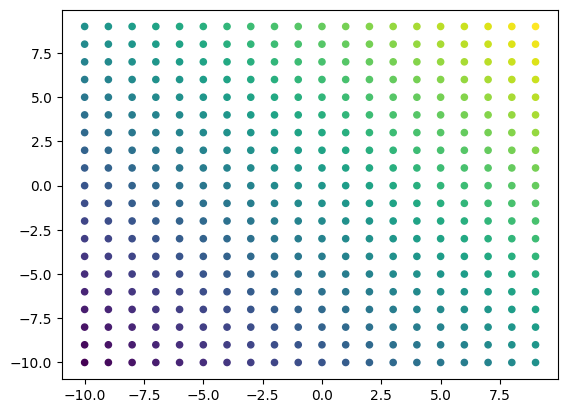

In [182]:
x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)
xx, yy = np.meshgrid(x, y)
plt.scatter(xx, yy, s=20, c=xx+yy)

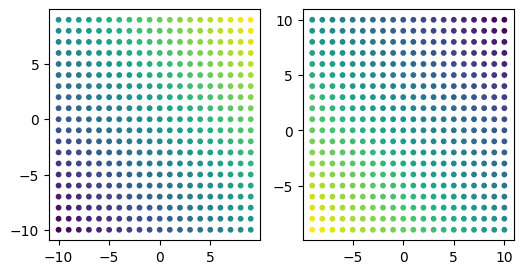

In [183]:
T = np.array([
[-1, 0],
[0, -1]
])
xy = np.vstack([xx.flatten(), yy.flatten()])
xy.shape
T @ xy[:, 0]
trans = T @ xy
trans.shape
xx_transformed = trans[0].reshape(xx.shape)
yy_transformed = trans[1].reshape(yy.shape)
f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)

In [189]:
print(" the T matrix rotated the points on the grid")

 the T matrix rotated the points on the grid
